# Final Report

<img src="assets/OURAScreenShot.png" alt="Oura Logo" title="Oura Ring" /><br>
# Gaining Insights From Mary's Oura Ring

## Introduction
Every night, your body performs the equivalent of modern health miracles - everything from improving memory to producing cancer killing T cells.<br>
And while you sleep, your body is sending a flurry of signals. When decoded, these signals - heart rate, body temperature and more - communicate your body’s progress as it prepares you for the next day. And night after night, you sleep through it.<br>

Oura interprets these signals so you can wake up to the insights you need to take on the day.<br>
Using the data gathered over the course of the last 17 months, this project will help to uncover long-term insights and patterns so that Mary can build on healthy practices every day and over time.<br>
This report will analyze Mary's sleep data from <font color=blue>March 2019 to August 2020</font>.

## What Does Mary Do?
Mary wears her <font color=royalblue>**Oura Ring**</font> on her right index finger.<br>
It's pretty light, I don't even know it is there. <br>
Oh, and it is stainless steel. It does not scratch. <br>
Here is what it looks like up close.

<img src="assets/OuraRing.png" alt="The Oura Ring.  Mary wears it on her right index finger." title="Oura Ring" />

## Why did I get an Oura Ring?
So I could improve how I sleep. <br>
But it actually helps me understand so much more! <br>

<img src="assets/Sleep_Oura.png" alt="How Do We Sleep?" title="Sleep Oura" />

# Getting Started:  Importing the Libraries and Configurations for Plotting

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np

# Reading In Mary's Oura Ring Data from the Last 17 Months

In [2]:
oringdata = pd.read_csv('data/oura_2019-03-09_2020-08-19_trends2.csv')

## Reviewing the first 5 rows of data

In [3]:
oringdata.head(5)

,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timing Score,Total Bedtime,...,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,3/9/19,91.0,99.0,97.0,62.0,100.0,82.0,78.0,100.0,31860.0,...,1,78.0,93.0,100.0,87.0,72.0,100.0,63.0,NaN,34.0
1,3/10/19,83.0,98.0,86.0,12.0,100.0,82.0,78.0,85.0,32220.0,...,0,86.0,78.0,92.0,91.0,75.0,96.0,96.0,NaN,75.0
2,3/11/19,84.0,92.0,91.0,30.0,100.0,82.0,78.0,100.0,28440.0,...,1,87.0,83.0,82.0,96.0,99.0,100.0,90.0,NaN,79.0
3,3/12/19,85.0,94.0,96.0,17.0,100.0,85.0,78.0,100.0,28980.0,...,0,83.0,85.0,81.0,80.0,98.0,100.0,100.0,NaN,31.0
4,3/13/19,96.0,96.0,100.0,96.0,99.0,94.0,84.0,100.0,30900.0,...,0,69.0,100.0,82.0,90.0,95.0,100.0,1.0,NaN,100.0


## Data Dictionary

Note: While there are more fields in the data set, only the fields that were used in the report for the analysis are defined.<br>
Not defining the Activity or most of the Readiness fields.<br>

| Field | Description |
| :--- | :--- |
| **Date** | String-converted to DateTime. The date of the reading in yyyy-mm-dd.|
| **Sleep Score** | Integer (Percent).  Ranging from 0-100%.  Is the overall measure of how well you slept.|
| **Lowest Resting HR** | Integer. Is the number of times your heart beats per minute when you're at rest. Displays the lowest 10 min avg it has detected.|
| **Average Resting HR** | Integer.  Is the number of times your heart beats per minute when you are at rest. Displays the loweest 10 min avg it has detected.|
| **Total Sleep** | Integer. Refers to the total amount of time you spend in light, REM and deep sleep.|
| **Sleep Efficiency** | Integer (Percent).  Is a measurement of your sleep quality.  It's the percentage of time you actually spend asleep after going to bed.|
| **Restfulness Score** | Integer (Percent).  Percentage of time sleep disturbances occurred caused by wake-ups and restless time during the sleep duration.|
| **REM Sleep Score** | Integer (Percent). REM (rapid eye movement) sleep percentage measuring the percentage of time you are in this sleep zone.  This sleep re-energizes your mind and body, and is associated with dreaming, memory consolidation, learning and creativity.|
| **Deep Sleep Score** | Integer (Percent). Percentage of the time spent in the most restorative and rejuvenating sleep stage, enabling muscle growth and repair.|
| **Sleep Latency Score** | Integer (Percent). Sleep latency is the time it takes for you to fall asleep.  This is the percentage of time you fall within 15-20 min (normal) sleep latency.|
| **Sleep Timing Score** | Integer (Percent). The percentage of time that you are actually within the sleep zones.  Oura considers Sleep Timing to be optimal and aligned with the sun when the midpoint of your sleep falls between midnight and 3am.  A time significantly earlier or later can lower the sleep score.|
| **Total Sleep Time** | Integer (In Seconds - will need to divide by 3600 for hours). The total amount of time you spend in light, REM, and Deep sleep.|
| **Bedtime Start** | Datetime.  The date and time estimate of the time you went to bed with the intention to sleep.|
| **Bedtime End** | Datetime.  The date and time estimate of the time you woke up with the intention to be awake. The time you got out of bed.|
| **Total Bedtime** | Integer (In Seconds). The difference between Bedtime Start and Bedtime End.|
| **Deep Sleep Time** | Integer (In Seconds).  The time you are in the REM Sleep Stage 3 which is the deepest sleep phase.|
| **Light Sleep Time** | Integer (In Seconds).  The time you are in N1 and N2 sleep, which are the 1st 2 stages of NREM sleep. This is somewhere between sleep and wakefulness.|
| **Awake Time** | Integer (In Seconds).  The time spent awake in bed before and after falling asleep.|
| **Respiratory Rate** | Float. The number of breaths a person takes per minute.|
| **Lowest Resting HR Score** | Integer. The number of times your heart beats per minute when you're at rest taking the lowest number. It's a good measurement of your sleep quality, recovery and overall health.|
| **Average HRV** | Integer. Average Heart Rate Variability is linked to your autonomic nervous system (ANS) and the balance between the parasympathetic (rest-and-digest) and sympathetic (fight-or-flight) branches. By balancing the two forces, the ANS helps you respond to daily stressors and regulate some of your body’s most important systems, including heart rate, respiration, and digestion. HRV is the most effective way of estimating your ANS balance, as it directly impacts your heart’s activity.|

## Let's see if the date is a true date

In [4]:
oringdata['date']

0       3/9/19
1      3/10/19
2      3/11/19
3      3/12/19
4      3/13/19
        ...   
524    8/14/20
525    8/15/20
526    8/16/20
527    8/17/20
528    8/18/20
Name: date, Length: 529, dtype: object

Nope, looks like we need to convert.

## Converting the date to a true Pandas datetime

In [5]:
oringdata['date'] = pd.to_datetime(oringdata['date'], format='%m/%d/%y')
oringdata['date']

0     2019-03-09
1     2019-03-10
2     2019-03-11
3     2019-03-12
4     2019-03-13
         ...    
524   2020-08-14
525   2020-08-15
526   2020-08-16
527   2020-08-17
528   2020-08-18
Name: date, Length: 529, dtype: datetime64[ns]

## Let's Look At the Shape of the Oura Ring Data

In [6]:
oringdata.shape

(529, 56)

## Let's get some basic metrics about the Oura Ring Data

In [7]:
oringdata.describe()

,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timing Score,Total Bedtime,Total Sleep Time,...,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,...,529.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,169.000000,524.000000
mean,86.573896,93.493282,91.435701,62.971209,97.869482,77.397313,74.829175,95.174664,31491.247601,29536.813820,...,0.117202,81.045802,84.263359,87.040076,77.664122,78.704198,94.339695,80.083969,82.100592,68.028626
std,5.137233,7.343001,11.268412,28.938681,5.874509,8.807422,11.830680,11.550317,3713.030301,3192.849858,...,0.360801,8.567458,11.961990,10.017209,32.132222,16.715546,11.312655,24.848693,13.373590,30.427187
min,42.000000,30.000000,16.000000,1.000000,25.000000,35.000000,10.000000,3.000000,15600.000000,13410.000000,...,0.000000,43.000000,1.000000,45.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,84.000000,90.000000,89.000000,40.000000,98.000000,72.000000,64.000000,100.000000,29040.000000,27420.000000,...,0.000000,76.000000,78.000000,81.000000,80.750000,71.750000,93.000000,71.750000,77.000000,43.000000
50%,87.000000,96.000000,96.000000,66.000000,100.000000,78.000000,72.000000,100.000000,30900.000000,29160.000000,...,0.000000,83.000000,85.000000,88.000000,90.000000,81.000000,99.000000,90.000000,87.000000,74.000000
75%,90.000000,99.000000,98.000000,94.000000,100.000000,83.000000,83.000000,100.000000,33540.000000,31290.000000,...,0.000000,87.000000,93.000000,95.000000,98.000000,91.000000,100.000000,99.000000,91.000000,100.000000
max,96.000000,100.000000,100.000000,100.000000,100.000000,98.000000,99.000000,100.000000,47940.000000,41640.000000,...,2.000000,98.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Is there any missing data?
Note: Showing all of the columns with the set option method

In [8]:
pd.set_option('display.max_columns', None)
oringdata.notnull().head(5)

,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timing Score,Total Bedtime,Total Sleep Time,Awake Time,REM Sleep Time,Light Sleep Time,Deep Sleep Time,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Sleep Timing.1,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation,Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Recovery Time Score,Activity Burn,Total Burn,Target Calories,Steps,Daily Movement,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True


### Looks like there are some null values with the *HRV Balance Score* and *Sleep Timing.1* column

The only columns that have some consistent null values are the **HRV Balance Score** and **Sleep Timing .1** columns. <br>
Although toward the end of the dataset, the **HRV Balance Score** has more non-null values. <br>
I think the reason the **HRV Balance Score** may be more populated toward the end of the dataset is because HRV Balance is generated through a longer-term comparison of my 2-week HRV trend and my 3-month personal baseline. <br>
This reflects how my day to day patterns of stress and recovery balance out over weeks. <br>
Basically, I didn't have enough data toward the beginning of the data set.

## Are there any other nulls in the data set?

In [9]:
null_df = pd.DataFrame(oringdata.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values('Count of Nulls', ascending=False, inplace=True)
null_df.head(15)

,Count of Nulls
Column,
Sleep Timing.1,529
HRV Balance Score,360
Bedtime Start,8
Deep Sleep Time,8
Sleep Score,8
Respiratory Rate,8
Temperature Deviation,8
Average HRV,8
Lowest Resting Heart Rate,8


## Looks like more attributes have some null values within the dataset 

I think the reason for this is because I may have left the ring charging on the night stand and I didn't wear it that evening. <br>
I need to confirm, but weird that it was 8 times during a 17 month period in which I did that. <br>


# Problem Statement <br>

Oura measures sleep using sensors that gauge body signals, including your resting heart rate (RHR), heart rate variability (HRV), body temperature, respiratory rate, and movement, to determine your sleep patterns. These sensors include a photoplethysmogram (PPG), a 3D accelerometer, and a temperature sensor. <br>

Each night you take a rollercoaster ride through the different phases of sleep.<br>
Even though you are unaware of what goes on while you are sleeping, your brain and body are in an active state.<br>
Each of your body signals shift during the <font color=midnightblue>**4 Different Stages of Sleep**</font><br>
Each stage of sleep has distinct restorative qualities, and how you move through each phase plays a large role in your body’s status the ensuing day.<br>

## Questions Mary will attempt to answer
1. How much is Mary investing in her sleep?  The widely accepted baseline for adults is **7 to 9 hours of sleep per night.** 
2. How much time is Mary spending in each sleep phase?  Is it enough to call it good quality sleep?
3. Does Mary have a good sleep score?
4. Is Mary stressed?  

## <font color=royalblue>**Sleep Stages**</font>

### <font color=orangered>Stage 0: Awake</font>
Awake time is the time spent in bed before and after falling asleep. It also includes brief awakenings during the night. These episodes are completely normal for healthy adults. 

### <font color=darkcyan>Stage 1 & 2: Light Sleep</font>
Light sleep initiates your sleep cycle and acts as a transition to deeper sleep stages. During this stage your muscles begin to relax, your heart rate and breathing slow down, and you wake up easily.

### <font color=rebeccapurple>Stage 3 & 4: Deep Sleep</font>
Deep sleep focuses on your body. It is the most rejuvenating and restorative sleep stage, promoting muscle growth and repair as well as waste removal in your brain. In this stage, you have difficulty waking up and are disoriented or groggy if awoken. 

### <font color=mediumorchid>Stage R: REM Sleep</font>
REM sleep is essential to re-energizing your mind. REM is associated with dreaming, memory consolidation, learning, and problem solving. The time spent in this sleep stage usually decreases with age.

<img src="assets/typicalnights_sleep.png" alt="TypicalNightsSleep" title="TypicalNightsSleep" />



# Time Spent In Bed
How long was I in bed each night?<br>
The reason I want to look at time in bed versus total sleep time is because this is the time I first put my body in the bed.  I also generally fall asleep pretty quickly unless I'm kept awake by other things.

In [10]:
avg_time_in_bed = oringdata['Total Bedtime'].mean()
avg_time_in_bed_hours = '%.2f'%(avg_time_in_bed/3600)
print('The average time in bed is',avg_time_in_bed_hours,'hrs')

The average time in bed is 8.75 hrs


## Converting the Total Bedtime to hours

In [11]:
oringdata['Total Bedtime'] = oringdata['Total Bedtime'].apply(lambda x:x/3600)
oringdata['Total Bedtime'] = oringdata['Total Bedtime'].apply(lambda x:round(x,2))
oringdata['Total Bedtime'].head(6)

0    8.85
1    8.95
2    7.90
3    8.05
4    8.58
5    8.35
Name: Total Bedtime, dtype: float64

## Dropping the null values from the Total Bedtime column

In [12]:
oringdata['Total Bedtime'].dropna
oringdata.head(5)

Column,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timing Score,Total Bedtime,Total Sleep Time,Awake Time,REM Sleep Time,Light Sleep Time,Deep Sleep Time,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Sleep Timing.1,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation,Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Recovery Time Score,Activity Burn,Total Burn,Target Calories,Steps,Daily Movement,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,2019-03-09,91.0,99.0,97.0,62.0,100.0,82.0,78.0,100.0,8.85,31350.0,510.0,7290.0,21330.0,2730.0,38.0,98.0,30.0,15780.0,NaN,2019-03-08T22:07:09-06:00,2019-03-09T06:58:09-06:00,92.125,80.0,11.0,0.01,17.875,97,96,95,95,100,99,100,709,2814,350,18446,13731,389,524,422,101,4,0,1.65625,1,78.0,93.0,100.0,87.0,72.0,100.0,63.0,NaN,34.0
1,2019-03-10,83.0,98.0,86.0,12.0,100.0,82.0,78.0,85.0,8.95,31260.0,960.0,5430.0,25290.0,540.0,42.0,97.0,30.0,16200.0,NaN,2019-03-09T22:59:47-05:00,2019-03-10T07:56:47-05:00,74.750,68.0,15.0,-0.18,17.000,89,71,100,78,100,98,98,272,2347,450,6862,3989,592,538,291,19,0,0,1.37500,0,86.0,78.0,92.0,91.0,75.0,96.0,96.0,NaN,75.0
2,2019-03-11,84.0,92.0,91.0,30.0,100.0,82.0,78.0,100.0,7.90,27930.0,510.0,5760.0,20790.0,1380.0,41.0,98.0,30.0,14070.0,NaN,2019-03-10T22:34:07-05:00,2019-03-11T06:28:07-05:00,74.125,69.0,20.0,-0.01,17.375,91,82,95,78,100,97,100,425,2498,450,9516,7378,503,482,295,57,5,98,1.46875,1,87.0,83.0,82.0,96.0,99.0,100.0,90.0,NaN,79.0
3,2019-03-12,85.0,94.0,96.0,17.0,100.0,85.0,78.0,100.0,8.05,28560.0,420.0,6660.0,21120.0,780.0,38.0,99.0,60.0,14310.0,NaN,2019-03-11T22:17:35-05:00,2019-03-12T06:20:35-05:00,75.000,66.0,18.0,0.02,16.875,92,86,100,78,100,97,100,494,2598,350,11213,8788,471,517,391,56,5,0,1.53125,0,83.0,85.0,81.0,80.0,98.0,100.0,100.0,NaN,31.0
4,2019-03-13,96.0,96.0,100.0,96.0,99.0,94.0,84.0,100.0,8.58,29160.0,1740.0,9870.0,14310.0,4980.0,28.0,94.0,1500.0,15840.0,NaN,2019-03-12T21:23:55-05:00,2019-03-13T05:58:55-05:00,94.625,89.0,9.0,0.02,18.000,93,98,100,78,100,97,98,552,2675,250,13468,9768,344,524,510,60,2,0,1.59375,0,69.0,100.0,82.0,90.0,95.0,100.0,1.0,NaN,100.0


## Let's see what this looks like over time

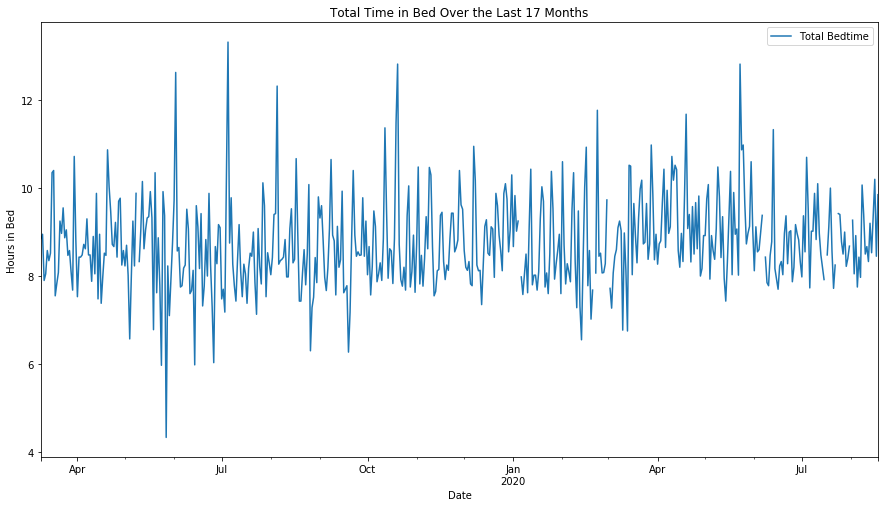

In [13]:
oringdata.plot(x='date', y='Total Bedtime')
plt.ylabel('Hours in Bed')
plt.xlabel('Date')
plt.title('Total Time in Bed Over the Last 17 Months');

Seems like I am pretty consistent. I spend between 8 and 10 hours in bed each night.<br>
<font color=darkcyan>**WOW!! That's a lot!**</font><br>

Maybe we should look at different days of the week and total time asleep.<br>
Let's first look at the distribution of how long I was in bed.

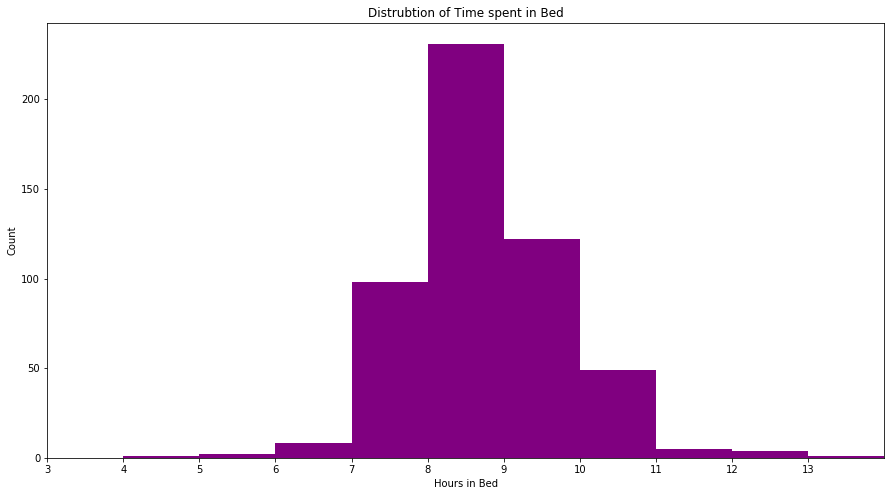

In [14]:
oringdata['Total Bedtime'].plot.hist(bins=10, range=(4,14), color='purple')
plt.xlim(4, 14)
plt.title('Distrubtion of Time spent in Bed')
plt.xticks(range(3, 14))
plt.xlabel('Hours in Bed')
plt.ylabel('Count');

In [15]:
oringdata['Total Bedtime'].std()

1.0315621128831085

For someone of my age, working a full time job, looks like the majority of the time, I'm in bed a total **8-9 hrs** each night. There's a standard deviation of about an hour.

## Let's compare with Total Sleep Time

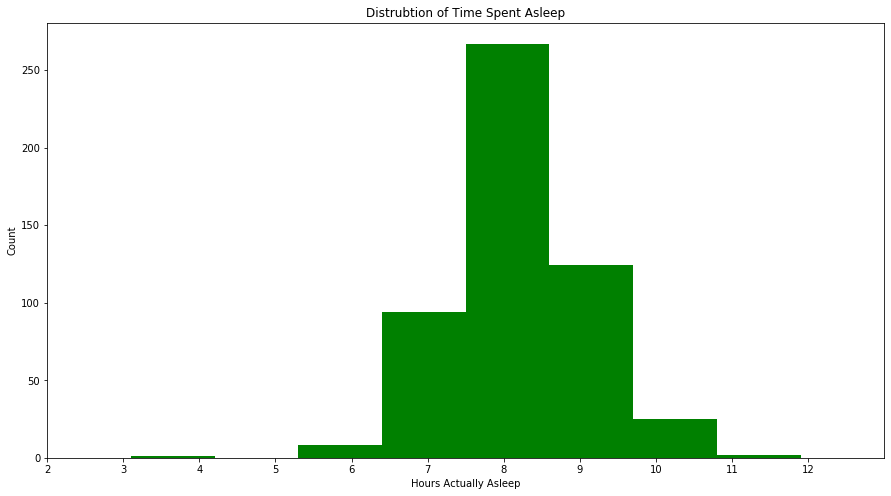

In [16]:
oringdata['Total Sleep Time'] = oringdata['Total Sleep Time'].apply(lambda x:x/3600)
oringdata['Total Sleep Time'] = oringdata['Total Sleep Time'].apply(lambda x:round(x,2))
oringdata['Total Sleep Time'].dropna
oringdata['Total Sleep Time'].plot.hist(bins=10, range=(2,13), color='green')
plt.xlim(2, 13)
plt.title('Distrubtion of Time Spent Asleep')
plt.xticks(range(2, 13))
plt.xlabel('Hours Actually Asleep')
plt.ylabel('Count');

## Creating a smaller dataframe from the larger one
As we saw before, there were over **56 columns** in the dataset. <br>
I'm going to narrow it down to focus on the different sleep stages.


In [17]:
sleep_phases = oringdata[['date', 'Awake Time', 'REM Sleep Time', 'Light Sleep Time', 'Deep Sleep Time', 'Restless Sleep']].copy()
sleep_modified = sleep_phases.apply(lambda x:x/3600 if x.name in ['Light Sleep Time', 'Awake Time', 'REM Sleep Time', 'Deep Sleep Time', 'Restless Sleep'] else x)
sleep_modified.dropna
sleep_modified.head(5)

Column,date,Awake Time,REM Sleep Time,Light Sleep Time,Deep Sleep Time,Restless Sleep
0,2019-03-09,0.141667,2.025000,5.925000,0.758333,0.010556
1,2019-03-10,0.266667,1.508333,7.025000,0.150000,0.011667
2,2019-03-11,0.141667,1.600000,5.775000,0.383333,0.011389
3,2019-03-12,0.116667,1.850000,5.866667,0.216667,0.010556
4,2019-03-13,0.483333,2.741667,3.975000,1.383333,0.007778


## Plotting the different Sleep Stages over Time

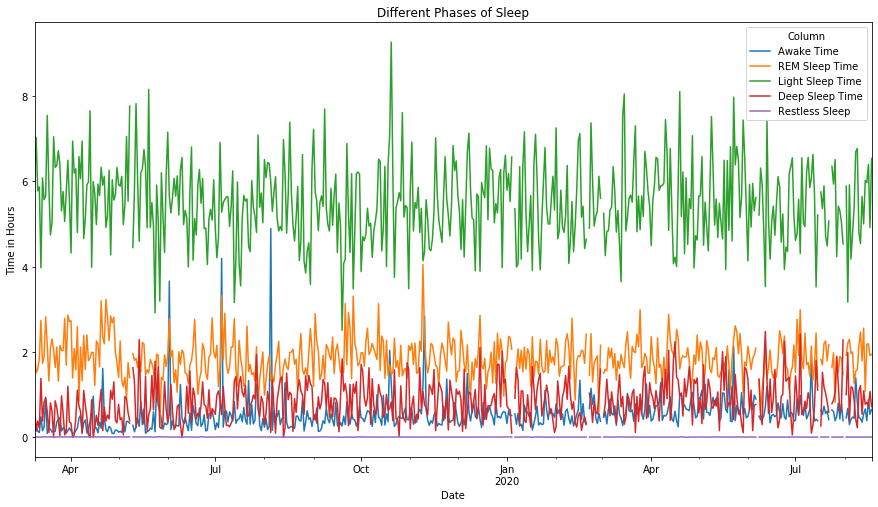

In [18]:
fig, ax = plt.subplots()
sleep_modified.plot(x="date", y=["Awake Time", "REM Sleep Time", "Light Sleep Time", "Deep Sleep Time", "Restless Sleep"], ax=ax)
ax.set_title('Different Phases of Sleep')
ax.set_ylabel('Time in Hours')
ax.set_xlabel('Date')
plt.show()

## Are My Sleep Stages Falling Within the Averages?

In [19]:
sleep_times = oringdata[['date','Total Sleep Time', 'Awake Time', 'REM Sleep Time', 'Light Sleep Time', 'Deep Sleep Time', 'Restless Sleep']].copy()
sleep_times = sleep_times.apply(lambda x:x/3600 if x.name in ['Light Sleep Time', 'Awake Time', 'REM Sleep Time', 'Deep Sleep Time', 'Restless Sleep'] else x)
sleep_times = sleep_times.apply(lambda x:round(x,2) if x.name in ['Light Sleep Time', 'Awake Time', 'REM Sleep Time', 'Deep Sleep Time', 'Restless Sleep'] else x)
sleep_times['Awake Percentage'] = (sleep_times['Awake Time']/sleep_times['Total Sleep Time'])*100
sleep_times['REM Percentage'] = (sleep_times['REM Sleep Time']/sleep_times['Total Sleep Time'])*100
sleep_times['Light Percentage'] = (sleep_times['Light Sleep Time']/sleep_times['Total Sleep Time'])*100
sleep_times['Deep Percentage'] = (sleep_times['Deep Sleep Time']/sleep_times['Total Sleep Time'])*100
sleep_times['Restless Percentage'] = (sleep_times['Restless Sleep']/sleep_times['Total Sleep Time'])*100
avg_awake_per = '%.2f' % sleep_times['Awake Percentage'].mean()
avg_REM_per = '%.2f' % sleep_times['REM Percentage'].mean()
avg_Light_per = '%.2f' % sleep_times['Light Percentage'].mean()
avg_Deep_per = '%.2f' % sleep_times['Deep Percentage'].mean()
avg_Restless_per = '%.2f' % sleep_times['Restless Percentage'].mean()
average_percentages = pd.DataFrame({'avg_awake_per':'%.2f' % sleep_times['Awake Percentage'].mean(), 'avg_REM_per':'%.2f' % sleep_times['REM Percentage'].mean(), 'avg_Light_per':'%.2f' % sleep_times['Light Percentage'].mean(), 'avg_Deep_per':'%.2f' % sleep_times['Deep Percentage'].mean(), 'avg_Restless_per':'%.2f' % sleep_times['Restless Percentage'].mean()},index=[0])
print(average_percentages,'\n\n')
print('Average Awake Percentage is', '%.2f' % sleep_times['Awake Percentage'].mean())
print('Average REM Sleep Percentage is', '%.2f' % sleep_times['REM Percentage'].mean())
print('Average Light Sleep Percentage is', '%.2f' % sleep_times['Light Percentage'].mean())
print('Average Restless Percentage is', '%.2f' % sleep_times['Restless Percentage'].mean())
print('Average Deep Percentage is', '%.2f' % sleep_times['Deep Percentage'].mean())


  avg_awake_per avg_REM_per avg_Light_per avg_Deep_per avg_Restless_per
0          6.62       22.71         66.96        10.32             0.12 


Average Awake Percentage is 6.62
Average REM Sleep Percentage is 22.71
Average Light Sleep Percentage is 66.96
Average Restless Percentage is 0.12
Average Deep Percentage is 10.32


In [20]:
print('Average Awake Time per night is', '%.2f' % sleep_times['Awake Time'].mean(),'hours')
print('Average REM Sleep Time per night is', '%.2f' % sleep_times['REM Sleep Time'].mean(),'hours')
print('Average Light Sleep Time per night is', '%.2f' % sleep_times['Light Sleep Time'].mean(),'hours')
print('Average Deep Sleep Time per night is', '%.2f' % sleep_times['Deep Sleep Time'].mean(),'hours')
print('Average Restless Sleep per night is', '%.2f' % sleep_times['Restless Sleep'].mean(),'hours')

Average Awake Time per night is 0.54 hours
Average REM Sleep Time per night is 1.86 hours
Average Light Sleep Time per night is 5.50 hours
Average Deep Sleep Time per night is 0.84 hours
Average Restless Sleep per night is 0.01 hours


## Compared to the chart:
<img src="assets/AverageTimeSpentinSleepStages.png" alt="SleepStageChart" title="SleepStageChart" /><br>
1. For the Awake Percentage:  Mary is at **6.6%** on average and **above** the Awake range
2. For the Light Sleep Percentage:  Mary is at almost **67%** on average and **above** the Light Sleep range
3. For the Deep Sleep Percentage:  Mary is at **10.3%** on average and **below** the Deep Sleep range
4. For the REM Sleep Percentage:  Mary is at almost **23%** on average and **within** the REM Sleep range

## Does sleep matter depending on which day of the week?
Let's look at sleep patterns during the week.<br>
Did I sleep more on the weekends? Which days of the week were the worst?<br>
I'm going to add 2 columns for <font color=indigo>**day_of_week**</font> and <font color=indigo>**day_type**</font>


In [21]:
newdf = oringdata[['date', 'Sleep Score', 'Total Bedtime', 'Lowest Resting Heart Rate']].copy()
newdf['day_of_week'] = newdf['date'].dt.day_name()
newdf['day_type'] = newdf['day_of_week'].apply(lambda x: 'Weekend' if x in ('Saturday','Sunday') else 'Weekday')
newdf.head(6)

Column,date,Sleep Score,Total Bedtime,Lowest Resting Heart Rate,day_of_week,day_type
0,2019-03-09,91.0,8.85,80.0,Saturday,Weekend
1,2019-03-10,83.0,8.95,68.0,Sunday,Weekend
2,2019-03-11,84.0,7.90,69.0,Monday,Weekday
3,2019-03-12,85.0,8.05,66.0,Tuesday,Weekday
4,2019-03-13,96.0,8.58,89.0,Wednesday,Weekday
5,2019-03-14,86.0,8.35,69.0,Thursday,Weekday


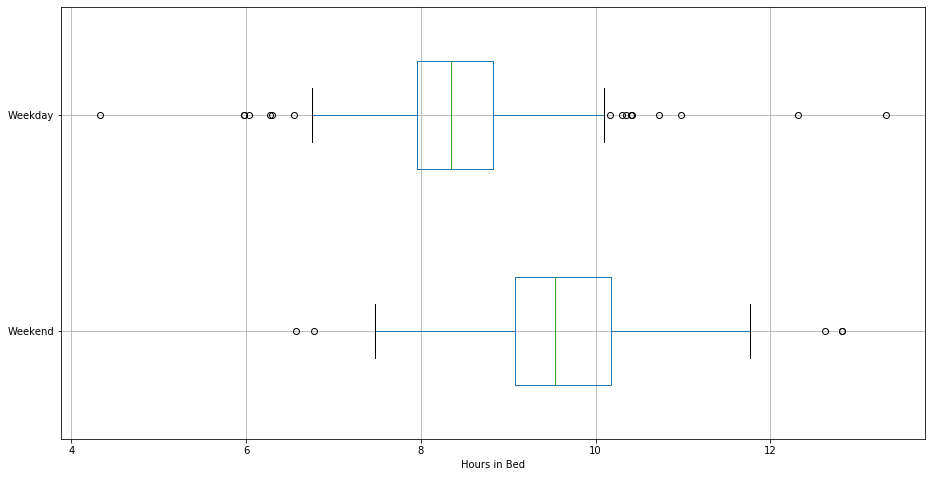

In [22]:
newdf.boxplot(column = 'Total Bedtime', by = 'day_type', positions = [2, 1], 
           vert = False, widths = 0.5)
plt.xlabel('Hours in Bed')
plt.suptitle('')
plt.title('');

Yes, this makes sense. I was in bed more during the weekend than I was during the week.

## Am I Stressed?
Yeah, probably.  But let's see.

In [23]:
newdf['Lowest Resting Heart Rate'].describe()

count    521.000000
mean      69.560461
std        4.490234
min       60.000000
25%       66.000000
50%       69.000000
75%       72.000000
max       89.000000
Name: Lowest Resting Heart Rate, dtype: float64

## How is my Lowest Resting Heart Rate on the Weekends vs. during the Week?

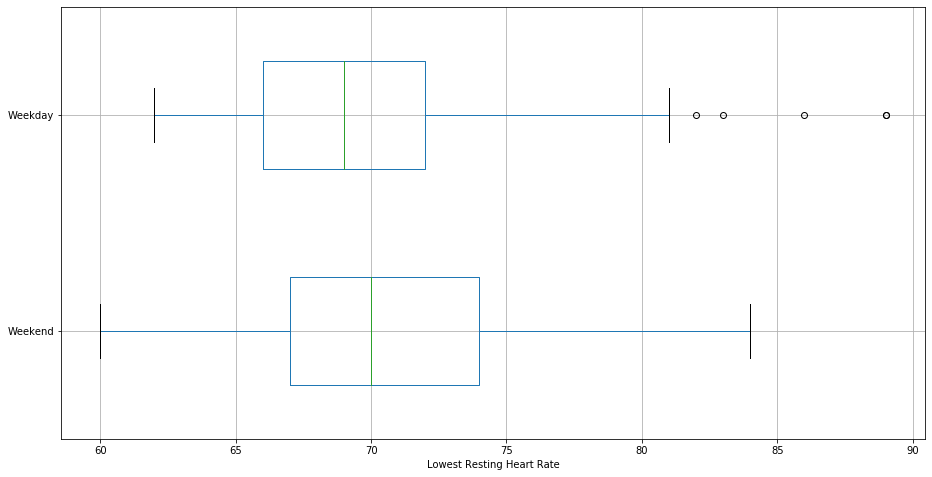

In [24]:
newdf.boxplot(column = 'Lowest Resting Heart Rate', by = 'day_type', positions = [2, 1], 
           vert = False, widths = 0.5)
plt.xlabel('Lowest Resting Heart Rate')
plt.suptitle('')
plt.title('');

Pretty close, although I seem to have slightly lower resting heart rates during the week. <br>
Maybe because I consume less <font color=maroon>**wine**</font> at night during the week than during the weekends?
<img src="assets/wine.png">

## Determining my Average Resting HR Score

In [25]:
HR_df = oringdata[['date','Lowest Resting Heart Rate','Resting Heart Rate Score']].copy()
HR_df['month_year'] = pd.to_datetime(HR_df['date']).dt.to_period('M')
HR_df['Avg Resting HR Score'] = HR_df.groupby(HR_df.month_year)['Resting Heart Rate Score'].transform('mean')
HR_df['Avg Resting HR Score'] = HR_df['Avg Resting HR Score'].apply(lambda x:round(x,2))
HR_df

Column,date,Lowest Resting Heart Rate,Resting Heart Rate Score,month_year,Avg Resting HR Score
0,2019-03-09,80.0,63.0,2019-03,73.65
1,2019-03-10,68.0,96.0,2019-03,73.65
2,2019-03-11,69.0,90.0,2019-03,73.65
3,2019-03-12,66.0,100.0,2019-03,73.65
4,2019-03-13,89.0,1.0,2019-03,73.65
...,...,...,...,...,...
524,2020-08-14,67.0,95.0,2020-08,75.88
525,2020-08-15,70.0,64.0,2020-08,75.88
526,2020-08-16,65.0,96.0,2020-08,75.88
527,2020-08-17,67.0,73.0,2020-08,75.88


## Seems pretty high
I think I am stressed and my metabolism is working overtime.<br> 
However, according to the American Heart Association, a normal <font color=red>**resting heart rate**</font> is between 60-100 beats per minute.<br>
I may still have to reassess my evening routine.<br>
The Oura Ring app actually allows you to view your resting heart rate trend. <br>
The data set doesn't provide times throughout the night at these heart rates.<br>
However, I have seen through the app that I have a downward slope of resting heart rate, meaning that my lowest heart rate occurs very late, almost into the morning.<br>

## What times do I go to bed throughout the week?

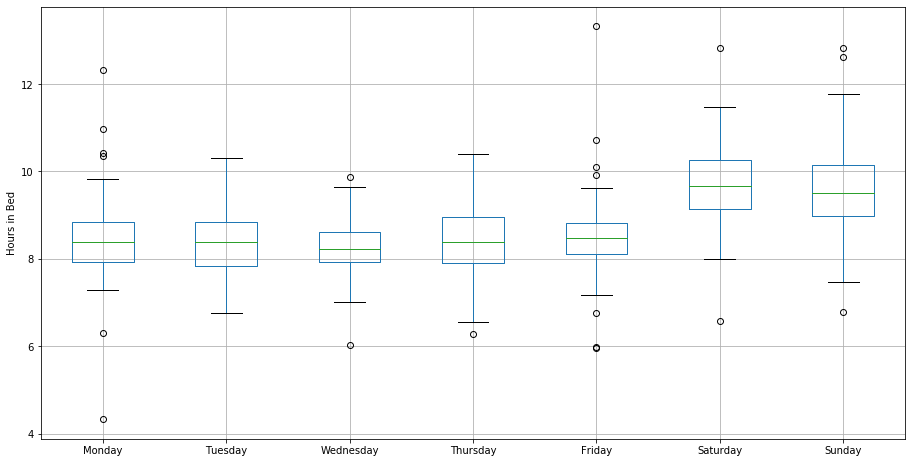

In [26]:
newdf.boxplot(column = 'Total Bedtime', by = 'day_of_week', positions = [5, 1, 6, 7, 4, 2, 3])

plt.suptitle('')
plt.title('')
plt.ylabel('Hours in Bed')
plt.xlabel('');

Looks like I'm pretty consistent. I do go to bed a little later on the weekend, which makes sense because I don't have to get up early for work.

## Sleep Quality By Month Since Getting the Oura Ring

### Attempting to get the Average Scores By Month

In [27]:
sleep_qual = oringdata[['date', 'Sleep Score', 'REM Sleep Score', 'Deep Sleep Score', 'Restfulness Score', 'Resting Heart Rate Score']].copy()
sleep_qual['day_of_week'] = sleep_qual['date'].dt.day_name()
sleep_qual['day_type'] = sleep_qual['day_of_week'].apply(lambda x: 'Weekend' if x in ('Saturday','Sunday') else 'Weekday')
sleep_qual['year'] = pd.DatetimeIndex(sleep_qual['date']).year
sleep_qual['month']= pd.DatetimeIndex(sleep_qual['date']).month
sleep_qual['month_year'] = pd.to_datetime(sleep_qual['date']).dt.to_period('M')
sleep_qual['AvgSleepScore'] = sleep_qual.groupby(sleep_qual.month_year)['Sleep Score'].transform('mean')
sleep_qual['AvgSleepScore'] = sleep_qual['AvgSleepScore'].apply(lambda x:round(x,2))
sleep_qual['AvgREMScore'] = sleep_qual.groupby(sleep_qual.month_year)['REM Sleep Score'].transform('mean')
sleep_qual['AvgREMScore'] = sleep_qual['AvgREMScore'].apply(lambda x:round(x,2))
sleep_qual['AvgDEEPScore'] = sleep_qual.groupby(sleep_qual.month_year)['Deep Sleep Score'].transform('mean')
sleep_qual['AvgDEEPScore'] = sleep_qual['AvgDEEPScore'].apply(lambda x:round(x,2))
sleep_qual['Avg Restfulness Score'] = sleep_qual.groupby(sleep_qual.month_year)['Restfulness Score'].transform('mean')
sleep_qual['Avg Restfulness Score'] = sleep_qual['Avg Restfulness Score'].apply(lambda x:round(x,2))
sleep_qual['Avg Resting HR Score'] = sleep_qual.groupby(sleep_qual.month_year)['Resting Heart Rate Score'].transform('mean')
sleep_qual['Avg Resting HR Score'] = sleep_qual['Avg Resting HR Score'].apply(lambda x:round(x,2))
sleep_qual

Column,date,Sleep Score,REM Sleep Score,Deep Sleep Score,Restfulness Score,Resting Heart Rate Score,day_of_week,day_type,year,month,month_year,AvgSleepScore,AvgREMScore,AvgDEEPScore,Avg Restfulness Score,Avg Resting HR Score
0,2019-03-09,91.0,97.0,62.0,82.0,63.0,Saturday,Weekend,2019,3,2019-03,87.61,94.91,43.30,81.91,73.65
1,2019-03-10,83.0,86.0,12.0,82.0,96.0,Sunday,Weekend,2019,3,2019-03,87.61,94.91,43.30,81.91,73.65
2,2019-03-11,84.0,91.0,30.0,82.0,90.0,Monday,Weekday,2019,3,2019-03,87.61,94.91,43.30,81.91,73.65
3,2019-03-12,85.0,96.0,17.0,85.0,100.0,Tuesday,Weekday,2019,3,2019-03,87.61,94.91,43.30,81.91,73.65
4,2019-03-13,96.0,100.0,96.0,94.0,1.0,Wednesday,Weekday,2019,3,2019-03,87.61,94.91,43.30,81.91,73.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2020-08-14,83.0,62.0,65.0,72.0,95.0,Friday,Weekday,2020,8,2020-08,87.18,93.24,68.47,77.29,75.88
525,2020-08-15,92.0,98.0,69.0,84.0,64.0,Saturday,Weekend,2020,8,2020-08,87.18,93.24,68.47,77.29,75.88
526,2020-08-16,86.0,98.0,61.0,60.0,96.0,Sunday,Weekend,2020,8,2020-08,87.18,93.24,68.47,77.29,75.88
527,2020-08-17,91.0,97.0,91.0,76.0,73.0,Monday,Weekday,2020,8,2020-08,87.18,93.24,68.47,77.29,75.88


## Plotting the Average Scores for 2 Months in 2020
I only chose 2 months because the averages are pretty similar over the 17 months.<br>
However, I did notice that in the first 3 months, I had lower overall scores comparatively.<br>

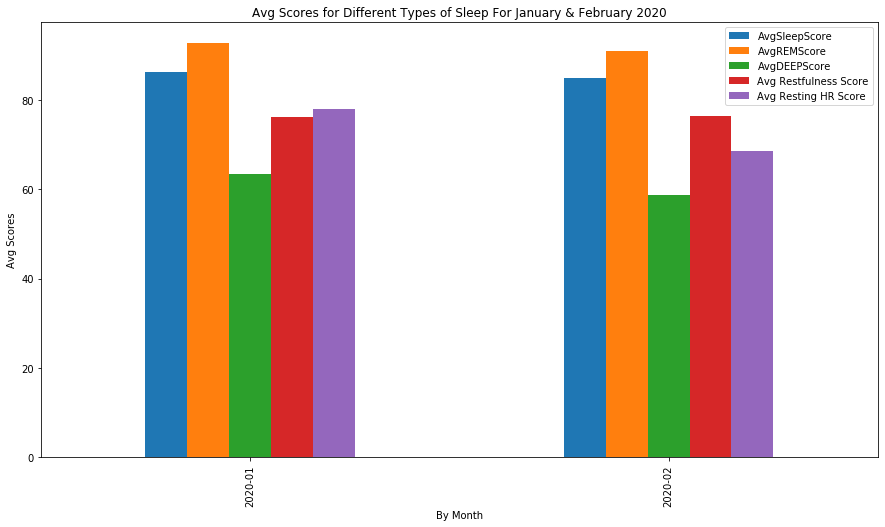

In [28]:
start_date = '2020-01-01'
end_date = '2020-02-29'
mask1 = (sleep_qual['date'] >= start_date) & (sleep_qual['date'] <= end_date)
sleep_qual = sleep_qual.loc[mask1]
sleep_qual = sleep_qual.loc[[312, 343], :]

dates = [(sleep_qual.iloc[0]['date']),(sleep_qual.iloc[1]['date'])]

fig, ax = plt.subplots()
x = np.arange(len(dates))
width = 0.5
sleep_qual.plot(kind='bar',x='month_year',y=["AvgSleepScore", "AvgREMScore","AvgDEEPScore","Avg Restfulness Score","Avg Resting HR Score"], ax=ax)
ax.set_ylabel('Avg Scores')
ax.set_xlabel('By Month')
ax.set_title('Avg Scores for Different Types of Sleep For January & February 2020')
ax.set_xticklabels(sleep_qual['month_year'])

ax.legend()
plt.show()


## Overall Sleep Score
According to Oura, if the Sleep Score meets or exceeds 85 on a given day, it means you had Excellent Sleep Quality.

### What is Mary's Average Sleep Score?

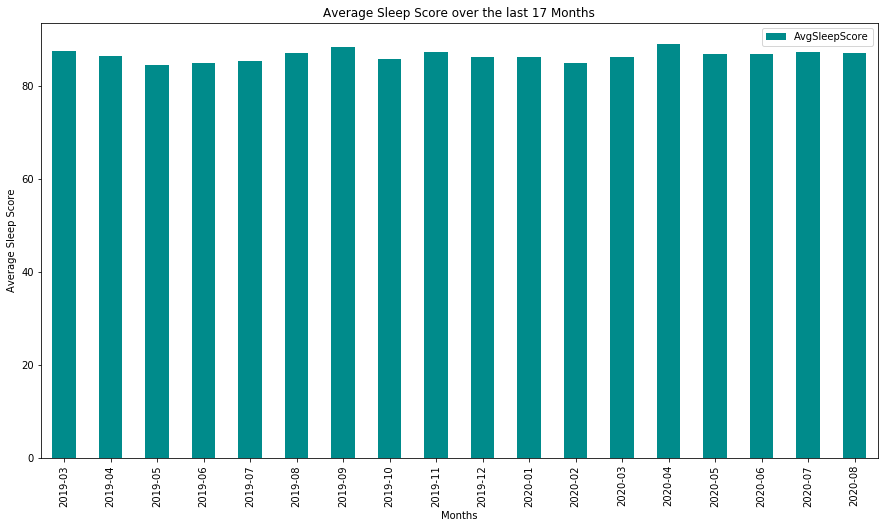

In [29]:
sleep_qual = oringdata[['date', 'Sleep Score', 'REM Sleep Score', 'Deep Sleep Score', 'Restfulness Score', 'Resting Heart Rate Score']].copy()
sleep_qual['day_of_week'] = sleep_qual['date'].dt.day_name()
sleep_qual['day_type'] = sleep_qual['day_of_week'].apply(lambda x: 'Weekend' if x in ('Saturday','Sunday') else 'Weekday')
sleep_qual['year'] = pd.DatetimeIndex(sleep_qual['date']).year
sleep_qual['month']= pd.DatetimeIndex(sleep_qual['date']).month
sleep_qual['month_year'] = pd.to_datetime(sleep_qual['date']).dt.to_period('M')
sleep_qual['AvgSleepScore'] = sleep_qual.groupby(sleep_qual.month_year)['Sleep Score'].transform('mean')
sleep_qual['AvgSleepScore'] = sleep_qual['AvgSleepScore'].apply(lambda x:round(x,2))


avg_sleep_scores = pd.DataFrame({'month_year': sleep_qual['month_year'].unique(), 'AvgSleepScore': sleep_qual['AvgSleepScore'].groupby(sleep_qual.month_year).unique()})
avg_sleep_scores['AvgSleepScore'] = avg_sleep_scores[['AvgSleepScore']].astype(float)
avg_sleep_scores.plot(kind='bar', color='darkcyan')
plt.title('Average Sleep Score over the last 17 Months')
plt.ylabel('Average Sleep Score')
plt.xlabel('Months');


Most of the Average Sleep Scores within each month look to be at or above 85. <br>
Looks like I had an Excellent sleep.

# Conclusion

1. How much is Mary investing in her sleep? <br>
Answer:  Mary is getting between **8-10 hrs** of sleep on weekdays and weekends.<br>


2. How much time is Mary spending in each sleep phase? Is it enough to call it good quality sleep?<br>
Answer: <font color=red>**I can do better!**</font><br>
Deep sleep takes your age into account and will result in an excellent Sleep Score around 90 minutes for young adults and 45 minutes for older individuals.<br>
Deep sleep is key for body restoration (e.g., muscle repair), while REM Sleep is associated with dreaming, memory consolidation, learning, and problem solving.<br>
I am averaging **0.84 hrs or 50.4 min** for Deep Sleep and **1.9 hrs** for REM Sleep.<br>


- **Getting more exercise and reducing caffine or alcohol before bed can improve resting heart rate and deep sleep scores.**<br>


- For the Awake Percentage: Mary is at **6.6%** on average and **above** the <font color=red>**Awake**</font> range
- For the Light Sleep Percentage: Mary is at almost **67%** on average and **above** the <font color=darkcyan>**Light**</font> Sleep range
- For the Deep Sleep Percentage: Mary is at **10.3%** on average and **below** the <font color=blueviolet>**Deep**</font> Sleep range
- For the REM Sleep Percentage: Mary is at almost **23%** on average and **within** the <font color=dodgerblue>**REM**</font> Sleep range<br>


3. Does Mary have a good sleep score?<br>
Answer: Yes! According to Oura, Mary has Average Sleep Scores at or above 85.  She has an <font color=green>**Excellent**</font> Sleep Score.<br>


4. Is Mary stressed? 
Answer:  Yes, probably!<br>

Note: There are more factors I would like to review to draw even more conclusions like the **Heart Rate Variability Balance Score** and **Heart Rate Variability**.  I would also like to see how restfullness and recovery play a part in sleep.  (Maybe a great idea for another project!)



## Important Links

* http://ouraring.com - Oura Ring Website
* https://ouraring.com/the-pulse - Oura Ring The Pulse Resource Site
* http://www.heart.org - American Heart Association